# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [31]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [32]:
train, test = keras.datasets.cifar10.load_data()

In [33]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [34]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [35]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [36]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5,3e-1,3e-2,3e-3]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95

## opt:SGD 

In [37]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

50000/50000 [==============================] - 3s 51us/step - loss: 1.4492 - acc: 0.4983 - val_loss: 1.6614 - val_acc: 0.4369
Epoch 50/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4362 - acc: 0.5020 - val_loss: 1.6845 - val_acc: 0.4309
Epoch 51/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4617 - acc: 0.4957 - val_loss: 1.6495 - val_acc: 0.4396
Epoch 52/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4391 - acc: 0.5019 - val_loss: 1.6248 - val_acc: 0.4443
Epoch 53/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4318 - acc: 0.5030 - val_loss: 1.6418 - val_acc: 0.4580
Epoch 54/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4327 - acc: 0.5054 - val_loss: 1.5864 - val_acc: 0.4596
Epoch 55/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4190 - acc: 0.5083 - val_loss: 1.6028 - val_acc: 0.4558
Epoch 56/100
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.8559 - acc: 0.3298 - val_loss: 1.6900 - val_acc: 0.3944
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.6197 - acc: 0.4211 - val_loss: 1.5503 - val_acc: 0.4443
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5224 - acc: 0.4606 - val_loss: 1.6558 - val_acc: 0.4197
Epoch 4/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4684 - acc: 0.4763 - val_loss: 1.5097 - val_acc: 0.4664
Epoch 5/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4173 - acc: 0.4953 - val_loss: 1.4551 - val_acc: 0.4819
Epoch 6/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.3787 - acc: 0.5079 - val_loss: 1.4208 - val_acc: 0.4978
Epoch 7/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.3457 - acc: 0.5211 - val_loss: 1.4283 - 

50000/50000 [==============================] - 3s 51us/step - loss: 0.3549 - acc: 0.8724 - val_loss: 2.4570 - val_acc: 0.5138
Epoch 60/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3254 - acc: 0.8822 - val_loss: 2.5074 - val_acc: 0.5246
Epoch 61/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3114 - acc: 0.8877 - val_loss: 2.5129 - val_acc: 0.5143
Epoch 62/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3008 - acc: 0.8910 - val_loss: 2.7036 - val_acc: 0.5092
Epoch 63/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3196 - acc: 0.8848 - val_loss: 2.7541 - val_acc: 0.5199
Epoch 64/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3172 - acc: 0.8843 - val_loss: 2.5769 - val_acc: 0.5158
Epoch 65/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.2910 - acc: 0.8956 - val_loss: 2.7274 - val_acc: 0.5158
Epoch 66/100
50000/50000 [==============

50000/50000 [==============================] - 3s 52us/step - loss: 1.4765 - acc: 0.4780 - val_loss: 1.4792 - val_acc: 0.4752
Epoch 10/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.4459 - acc: 0.4880 - val_loss: 1.4790 - val_acc: 0.4722
Epoch 11/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.4208 - acc: 0.4970 - val_loss: 1.4658 - val_acc: 0.4803
Epoch 12/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.3969 - acc: 0.5044 - val_loss: 1.4363 - val_acc: 0.4914
Epoch 13/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.3724 - acc: 0.5116 - val_loss: 1.4246 - val_acc: 0.4939
Epoch 14/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.3532 - acc: 0.5199 - val_loss: 1.4212 - val_acc: 0.4932
Epoch 15/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.3315 - acc: 0.5277 - val_loss: 1.4451 - val_acc: 0.4765
Epoch 16/100
50000/50000 [==============

50000/50000 [==============================] - 3s 52us/step - loss: 0.5635 - acc: 0.8012 - val_loss: 1.8628 - val_acc: 0.5007
Epoch 69/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5525 - acc: 0.8056 - val_loss: 1.8123 - val_acc: 0.5038
Epoch 70/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.5450 - acc: 0.8086 - val_loss: 1.7254 - val_acc: 0.5265
Epoch 71/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5270 - acc: 0.8164 - val_loss: 1.8125 - val_acc: 0.5115
Epoch 72/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5208 - acc: 0.8172 - val_loss: 1.8528 - val_acc: 0.5133
Epoch 73/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5100 - acc: 0.8224 - val_loss: 1.7956 - val_acc: 0.5292
Epoch 74/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5106 - acc: 0.8208 - val_loss: 1.9263 - val_acc: 0.5049
Epoch 75/100
50000/50000 [==============

50000/50000 [==============================] - 3s 51us/step - loss: 1.7334 - acc: 0.3912 - val_loss: 1.7253 - val_acc: 0.3931
Epoch 19/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.7233 - acc: 0.3955 - val_loss: 1.7146 - val_acc: 0.4006
Epoch 20/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.7141 - acc: 0.3996 - val_loss: 1.7055 - val_acc: 0.4006
Epoch 21/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.7051 - acc: 0.4019 - val_loss: 1.6975 - val_acc: 0.4052
Epoch 22/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.6964 - acc: 0.4054 - val_loss: 1.6900 - val_acc: 0.4080
Epoch 23/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.6882 - acc: 0.4066 - val_loss: 1.6822 - val_acc: 0.4090
Epoch 24/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.6797 - acc: 0.4111 - val_loss: 1.6735 - val_acc: 0.4131
Epoch 25/100
50000/50000 [==============

50000/50000 [==============================] - 3s 51us/step - loss: 1.4110 - acc: 0.5022 - val_loss: 1.4545 - val_acc: 0.4812
Epoch 78/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4070 - acc: 0.5035 - val_loss: 1.4524 - val_acc: 0.4813
Epoch 79/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.4039 - acc: 0.5050 - val_loss: 1.4530 - val_acc: 0.4814
Epoch 80/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.4004 - acc: 0.5056 - val_loss: 1.4497 - val_acc: 0.4842
Epoch 81/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.3967 - acc: 0.5066 - val_loss: 1.4472 - val_acc: 0.4847
Epoch 82/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.3927 - acc: 0.5090 - val_loss: 1.4442 - val_acc: 0.4855
Epoch 83/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.3890 - acc: 0.5093 - val_loss: 1.4426 - val_acc: 0.4838
Epoch 84/100
50000/50000 [==============

50000/50000 [==============================] - 3s 51us/step - loss: 2.0383 - acc: 0.2766 - val_loss: 2.0359 - val_acc: 0.2772
Epoch 28/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.0315 - acc: 0.2799 - val_loss: 2.0292 - val_acc: 0.2822
Epoch 29/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.0248 - acc: 0.2823 - val_loss: 2.0228 - val_acc: 0.2834
Epoch 30/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.0184 - acc: 0.2849 - val_loss: 2.0166 - val_acc: 0.2860
Epoch 31/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.0121 - acc: 0.2879 - val_loss: 2.0105 - val_acc: 0.2881
Epoch 32/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.0059 - acc: 0.2897 - val_loss: 2.0047 - val_acc: 0.2910
Epoch 33/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.0001 - acc: 0.2931 - val_loss: 1.9990 - val_acc: 0.2934
Epoch 34/100
50000/50000 [==============

50000/50000 [==============================] - 3s 53us/step - loss: 1.8314 - acc: 0.3549 - val_loss: 1.8341 - val_acc: 0.3581
Epoch 87/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.8296 - acc: 0.3553 - val_loss: 1.8322 - val_acc: 0.3600
Epoch 88/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.8278 - acc: 0.3563 - val_loss: 1.8304 - val_acc: 0.3608
Epoch 89/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.8259 - acc: 0.3572 - val_loss: 1.8284 - val_acc: 0.3614
Epoch 90/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.8240 - acc: 0.3571 - val_loss: 1.8267 - val_acc: 0.3612
Epoch 91/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.8222 - acc: 0.3585 - val_loss: 1.8249 - val_acc: 0.3614
Epoch 92/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.8204 - acc: 0.3586 - val_loss: 1.8232 - val_acc: 0.3641
Epoch 93/100
50000/50000 [==============

Epoch 36/100
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/100
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100


50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.03

50000/50000 [==============================] - 3s 52us/step - loss: 0.7370 - acc: 0.7353 - val_loss: 1.7730 - val_acc: 0.5072
Epoch 45/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.7305 - acc: 0.7358 - val_loss: 1.8406 - val_acc: 0.5093
Epoch 46/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.7207 - acc: 0.7373 - val_loss: 1.7939 - val_acc: 0.5034
Epoch 47/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.7097 - acc: 0.7424 - val_loss: 1.8275 - val_acc: 0.5185
Epoch 48/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.7112 - acc: 0.7443 - val_loss: 1.9016 - val_acc: 0.5067
Epoch 49/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.7048 - acc: 0.7467 - val_loss: 1.8612 - val_acc: 0.5104
Epoch 50/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.6885 - acc: 0.7513 - val_loss: 1.8880 - val_acc: 0.5110
Epoch 51/100
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.9182 - acc: 0.3135 - val_loss: 1.7348 - val_acc: 0.3871
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.6620 - acc: 0.4117 - val_loss: 1.6489 - val_acc: 0.4074
Epoch 3/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.5691 - acc: 0.4441 - val_loss: 1.5587 - val_acc: 0.4466
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5028 - acc: 0.4663 - val_loss: 1.5110 - val_acc: 0.4563
Epoch 5/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4526 - acc: 0.4845 - val_loss: 1.4836 - val_acc: 0.4686
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4089 - acc: 0.4997 - val_loss: 1.4858 - val_acc: 0.4813
Epoch 7/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.3730 - acc: 0.5122 - val_loss: 1.5778 - 

50000/50000 [==============================] - 3s 52us/step - loss: 0.3670 - acc: 0.8685 - val_loss: 2.1215 - val_acc: 0.5286
Epoch 60/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.3568 - acc: 0.8737 - val_loss: 2.1901 - val_acc: 0.5234
Epoch 61/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3422 - acc: 0.8780 - val_loss: 2.2138 - val_acc: 0.5280
Epoch 62/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.3524 - acc: 0.8736 - val_loss: 2.3749 - val_acc: 0.5109
Epoch 63/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.3350 - acc: 0.8793 - val_loss: 2.3011 - val_acc: 0.5256
Epoch 64/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3171 - acc: 0.8860 - val_loss: 2.3366 - val_acc: 0.5150
Epoch 65/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.3060 - acc: 0.8899 - val_loss: 2.4085 - val_acc: 0.5176
Epoch 66/100
50000/50000 [==============

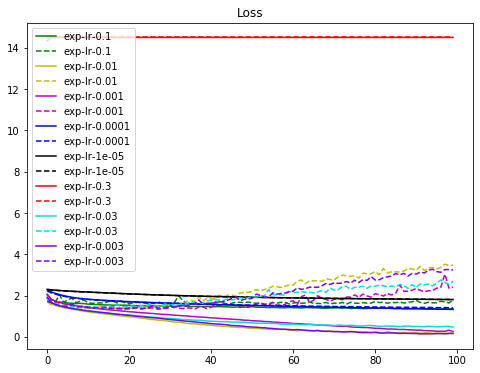

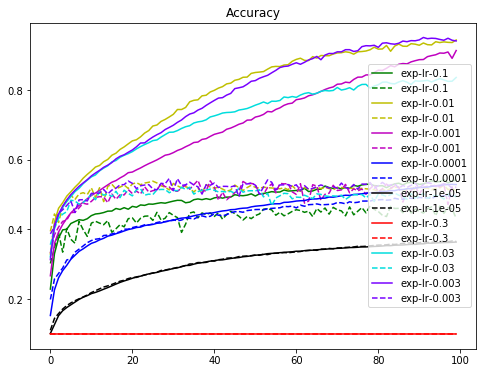

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## opt: RMSprop

In [49]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.rmsprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 61us/step - loss: 14.4337 - acc: 0.1007 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_lo

Epoch 59/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100


50000/50000 [==============================] - 3s 55us/step - loss: 1.5548 - acc: 0.4419 - val_loss: 1.6155 - val_acc: 0.4251
Epoch 9/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.5262 - acc: 0.4544 - val_loss: 1.6616 - val_acc: 0.4161
Epoch 10/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4976 - acc: 0.4644 - val_loss: 1.5428 - val_acc: 0.4456
Epoch 11/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4718 - acc: 0.4736 - val_loss: 1.5146 - val_acc: 0.4645
Epoch 12/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.4429 - acc: 0.4840 - val_loss: 1.5252 - val_acc: 0.4606
Epoch 13/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4196 - acc: 0.4933 - val_loss: 1.8082 - val_acc: 0.3809
Epoch 14/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.3925 - acc: 0.5026 - val_loss: 1.5349 - val_acc: 0.4573
Epoch 15/100
50000/50000 [===============

50000/50000 [==============================] - 3s 55us/step - loss: 0.6185 - acc: 0.7765 - val_loss: 2.1482 - val_acc: 0.4785
Epoch 68/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.6144 - acc: 0.7821 - val_loss: 2.2902 - val_acc: 0.4632
Epoch 69/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6038 - acc: 0.7824 - val_loss: 2.5378 - val_acc: 0.4619
Epoch 70/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.5984 - acc: 0.7847 - val_loss: 2.4525 - val_acc: 0.4718
Epoch 71/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.5903 - acc: 0.7866 - val_loss: 2.6883 - val_acc: 0.4767
Epoch 72/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.5848 - acc: 0.7915 - val_loss: 2.4945 - val_acc: 0.4847
Epoch 73/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.5723 - acc: 0.7937 - val_loss: 2.4949 - val_acc: 0.4801
Epoch 74/100
50000/50000 [==============

50000/50000 [==============================] - 3s 55us/step - loss: 1.3534 - acc: 0.5208 - val_loss: 1.4632 - val_acc: 0.4738
Epoch 18/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.3361 - acc: 0.5273 - val_loss: 1.5166 - val_acc: 0.4587
Epoch 19/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.3190 - acc: 0.5358 - val_loss: 1.4779 - val_acc: 0.4701
Epoch 20/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.3079 - acc: 0.5405 - val_loss: 1.4542 - val_acc: 0.4770
Epoch 21/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2929 - acc: 0.5439 - val_loss: 1.4887 - val_acc: 0.4665
Epoch 22/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2738 - acc: 0.5503 - val_loss: 1.4900 - val_acc: 0.4821
Epoch 23/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2607 - acc: 0.5542 - val_loss: 1.4646 - val_acc: 0.4875
Epoch 24/100
50000/50000 [==============

50000/50000 [==============================] - 3s 54us/step - loss: 0.6933 - acc: 0.7585 - val_loss: 1.6122 - val_acc: 0.5060
Epoch 77/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.6886 - acc: 0.7624 - val_loss: 1.5006 - val_acc: 0.5333
Epoch 78/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6743 - acc: 0.7644 - val_loss: 1.7277 - val_acc: 0.4864
Epoch 79/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6708 - acc: 0.7672 - val_loss: 1.5686 - val_acc: 0.5285
Epoch 80/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.6547 - acc: 0.7723 - val_loss: 1.5887 - val_acc: 0.5133
Epoch 81/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.6467 - acc: 0.7761 - val_loss: 1.5643 - val_acc: 0.5280
Epoch 82/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.6440 - acc: 0.7749 - val_loss: 1.6065 - val_acc: 0.5176
Epoch 83/100
50000/50000 [==============

50000/50000 [==============================] - 3s 55us/step - loss: 1.5343 - acc: 0.4657 - val_loss: 1.5508 - val_acc: 0.4540
Epoch 27/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5265 - acc: 0.4680 - val_loss: 1.5555 - val_acc: 0.4560
Epoch 28/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5199 - acc: 0.4691 - val_loss: 1.5427 - val_acc: 0.4502
Epoch 29/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.5136 - acc: 0.4723 - val_loss: 1.5385 - val_acc: 0.4537
Epoch 30/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5065 - acc: 0.4741 - val_loss: 1.5369 - val_acc: 0.4593
Epoch 31/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5002 - acc: 0.4778 - val_loss: 1.5290 - val_acc: 0.4596
Epoch 32/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4947 - acc: 0.4801 - val_loss: 1.5207 - val_acc: 0.4664
Epoch 33/100
50000/50000 [==============

50000/50000 [==============================] - 3s 55us/step - loss: 1.2740 - acc: 0.5566 - val_loss: 1.4012 - val_acc: 0.5015
Epoch 86/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2712 - acc: 0.5581 - val_loss: 1.3912 - val_acc: 0.5055
Epoch 87/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2674 - acc: 0.5588 - val_loss: 1.3937 - val_acc: 0.5057
Epoch 88/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2645 - acc: 0.5590 - val_loss: 1.3869 - val_acc: 0.5088
Epoch 89/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2607 - acc: 0.5608 - val_loss: 1.3800 - val_acc: 0.5089
Epoch 90/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2584 - acc: 0.5611 - val_loss: 1.3981 - val_acc: 0.5049
Epoch 91/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.2559 - acc: 0.5615 - val_loss: 1.3978 - val_acc: 0.5085
Epoch 92/100
50000/50000 [==============

Epoch 35/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/100


50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 

50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/50000 [

50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.003000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)           

50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/100
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000loss: 14.5078 - acc: 
Epoch 53/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch

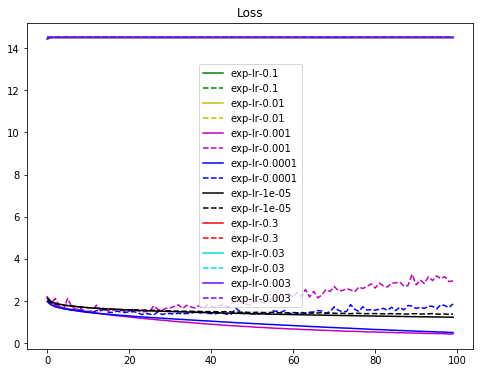

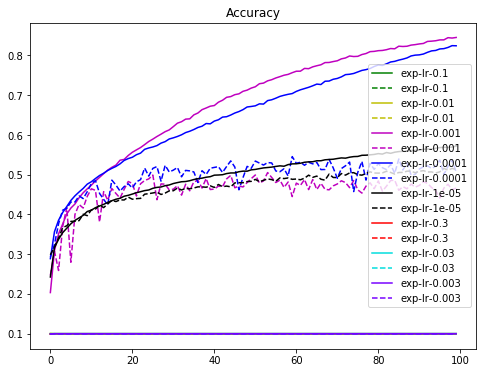

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## opt:AdaGrad

In [52]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.10004 - acc: 0.09
Epoch 56/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 62us/step - loss: 14.4504 - acc: 0.0986 - val_loss: 14.5061 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 3s 56us/step - loss: 14.5060 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 3s 55us/step - loss: 6.2472 - acc: 0.1593 - val_loss: 2.0494 - val_acc: 0.2208
Epoch 4/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.9213 - acc: 0.3045 - val_loss: 1.8752 - val_acc: 0.3056
Epoch 5/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.7891 - acc: 0.3585 - val_loss: 1.7911 - val_acc: 0.3662
Epoch 6/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.7091 - acc: 0.3894 - val_loss: 1.8364 - val_acc: 0.3557
Epoch 7/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.6577 - acc: 0.4109 - val_loss: 1.716

50000/50000 [==============================] - 3s 54us/step - loss: 1.0022 - acc: 0.6524 - val_loss: 1.4507 - val_acc: 0.5070
Epoch 60/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.9956 - acc: 0.6532 - val_loss: 1.4181 - val_acc: 0.5184
Epoch 61/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.9883 - acc: 0.6572 - val_loss: 1.4362 - val_acc: 0.5154
Epoch 62/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.9817 - acc: 0.6586 - val_loss: 1.4571 - val_acc: 0.5134
Epoch 63/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.9758 - acc: 0.6595 - val_loss: 1.4756 - val_acc: 0.5089
Epoch 64/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.9729 - acc: 0.6595 - val_loss: 1.4470 - val_acc: 0.5104
Epoch 65/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.9644 - acc: 0.6650 - val_loss: 1.5055 - val_acc: 0.5007
Epoch 66/100
50000/50000 [==============

50000/50000 [==============================] - 3s 56us/step - loss: 1.5789 - acc: 0.4472 - val_loss: 1.6319 - val_acc: 0.4140
Epoch 10/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.5627 - acc: 0.4514 - val_loss: 1.5737 - val_acc: 0.4497
Epoch 11/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.5458 - acc: 0.4583 - val_loss: 1.5686 - val_acc: 0.4468
Epoch 12/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5319 - acc: 0.4633 - val_loss: 1.5519 - val_acc: 0.4550
Epoch 13/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.5186 - acc: 0.4678 - val_loss: 1.5358 - val_acc: 0.4536
Epoch 14/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.5066 - acc: 0.4714 - val_loss: 1.5465 - val_acc: 0.4512
Epoch 15/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.4926 - acc: 0.4774 - val_loss: 1.6009 - val_acc: 0.4288
Epoch 16/100
50000/50000 [==============

50000/50000 [==============================] - 3s 54us/step - loss: 1.1969 - acc: 0.5843 - val_loss: 1.3481 - val_acc: 0.5232
Epoch 69/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.1940 - acc: 0.5851 - val_loss: 1.3570 - val_acc: 0.5139
Epoch 70/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.1891 - acc: 0.5873 - val_loss: 1.3589 - val_acc: 0.5159
Epoch 71/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.1862 - acc: 0.5893 - val_loss: 1.3586 - val_acc: 0.5120
Epoch 72/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.1834 - acc: 0.5897 - val_loss: 1.3511 - val_acc: 0.5199
Epoch 73/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.1799 - acc: 0.5904 - val_loss: 1.3468 - val_acc: 0.5218
Epoch 74/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.1771 - acc: 0.5936 - val_loss: 1.3406 - val_acc: 0.5236
Epoch 75/100
50000/50000 [==============

50000/50000 [==============================] - 3s 54us/step - loss: 1.7364 - acc: 0.3934 - val_loss: 1.7429 - val_acc: 0.3896
Epoch 19/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7318 - acc: 0.3951 - val_loss: 1.7388 - val_acc: 0.3874
Epoch 20/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.7277 - acc: 0.3962 - val_loss: 1.7359 - val_acc: 0.3938
Epoch 21/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.7236 - acc: 0.3983 - val_loss: 1.7307 - val_acc: 0.3936
Epoch 22/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.7197 - acc: 0.3989 - val_loss: 1.7273 - val_acc: 0.3937
Epoch 23/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7159 - acc: 0.4009 - val_loss: 1.7240 - val_acc: 0.3940
Epoch 24/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7125 - acc: 0.4025 - val_loss: 1.7220 - val_acc: 0.3965
Epoch 25/100
50000/50000 [==============

50000/50000 [==============================] - 3s 53us/step - loss: 1.6116 - acc: 0.4404 - val_loss: 1.6287 - val_acc: 0.4291
Epoch 78/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.6104 - acc: 0.4405 - val_loss: 1.6279 - val_acc: 0.4302
Epoch 79/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.6091 - acc: 0.4410 - val_loss: 1.6273 - val_acc: 0.4282
Epoch 80/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.6081 - acc: 0.4423 - val_loss: 1.6262 - val_acc: 0.4313
Epoch 81/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.6069 - acc: 0.4415 - val_loss: 1.6254 - val_acc: 0.4314
Epoch 82/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.6058 - acc: 0.4431 - val_loss: 1.6238 - val_acc: 0.4323
Epoch 83/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.6048 - acc: 0.4439 - val_loss: 1.6234 - val_acc: 0.4327
Epoch 84/100
50000/50000 [==============

50000/50000 [==============================] - 3s 53us/step - loss: 2.0654 - acc: 0.2851 - val_loss: 2.0656 - val_acc: 0.2791
Epoch 28/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.0628 - acc: 0.2857 - val_loss: 2.0629 - val_acc: 0.2796
Epoch 29/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.0602 - acc: 0.2864 - val_loss: 2.0603 - val_acc: 0.2812
Epoch 30/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.0577 - acc: 0.2872 - val_loss: 2.0579 - val_acc: 0.2833
Epoch 31/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.0553 - acc: 0.2880 - val_loss: 2.0555 - val_acc: 0.2853
Epoch 32/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.0530 - acc: 0.2888 - val_loss: 2.0531 - val_acc: 0.2871
Epoch 33/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.0507 - acc: 0.2894 - val_loss: 2.0509 - val_acc: 0.2886
Epoch 34/100
50000/50000 [==============

50000/50000 [==============================] - 3s 54us/step - loss: 1.9779 - acc: 0.3120 - val_loss: 1.9786 - val_acc: 0.3118
Epoch 87/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9770 - acc: 0.3126 - val_loss: 1.9777 - val_acc: 0.3122
Epoch 88/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9761 - acc: 0.3129 - val_loss: 1.9768 - val_acc: 0.3127
Epoch 89/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.9752 - acc: 0.3135 - val_loss: 1.9759 - val_acc: 0.3131
Epoch 90/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9743 - acc: 0.3134 - val_loss: 1.9750 - val_acc: 0.3135
Epoch 91/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9734 - acc: 0.3140 - val_loss: 1.9741 - val_acc: 0.3130
Epoch 92/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9725 - acc: 0.3141 - val_loss: 1.9733 - val_acc: 0.3135
Epoch 93/100
50000/50000 [==============

Epoch 36/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/100
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100


50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.03

50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/100
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/100
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 59us/step - loss: 2.1600 - acc: 0.2270 - val_loss: 2.0816 - val_acc: 0.2364
Epoch 2/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.9012 - acc: 0.3188 - val_loss: 1.8666 - val_acc: 0.3310
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.8169 - acc: 0.3506 - val_loss: 1.7710 - val_acc: 0.3696
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7548 - acc: 0.3710 - val_loss: 1.7684 - val_acc: 0.3707
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7052 - acc: 0.3915 - val_loss: 1.7134 - val_acc: 0.3823
Epoch 6/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.6725 - acc: 0.4037 - val_loss: 1.6817 - val_acc: 0.3961
Epoch 7/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.6406 - acc: 0.4168 - val_loss: 1.6355 - 

50000/50000 [==============================] - 3s 54us/step - loss: 1.1923 - acc: 0.5788 - val_loss: 1.3589 - val_acc: 0.5214
Epoch 60/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.1831 - acc: 0.5829 - val_loss: 1.3658 - val_acc: 0.5191
Epoch 61/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.1803 - acc: 0.5826 - val_loss: 1.3535 - val_acc: 0.5236
Epoch 62/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.1757 - acc: 0.5850 - val_loss: 1.3608 - val_acc: 0.5171
Epoch 63/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.1738 - acc: 0.5863 - val_loss: 1.3747 - val_acc: 0.5130
Epoch 64/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.1670 - acc: 0.5887 - val_loss: 1.3581 - val_acc: 0.5222
Epoch 65/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.1631 - acc: 0.5905 - val_loss: 1.4085 - val_acc: 0.5096
Epoch 66/100
50000/50000 [==============

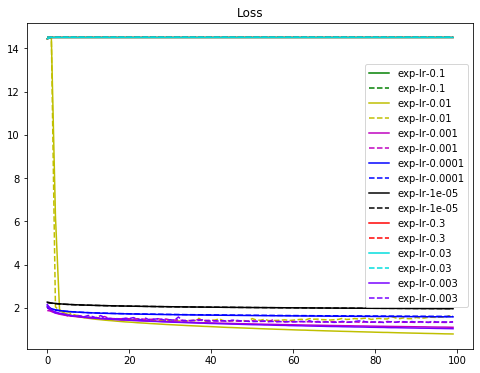

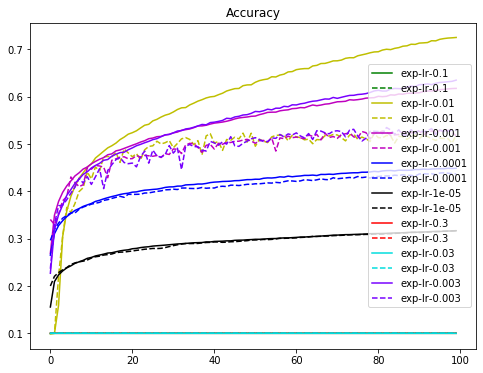

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## opt:Adam

In [54]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 72us/step - loss: 14.4400 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_lo

Epoch 59/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100


50000/50000 [==============================] - 3s 58us/step - loss: 1.4094 - acc: 0.4962 - val_loss: 1.4937 - val_acc: 0.4647
Epoch 9/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.3876 - acc: 0.5038 - val_loss: 1.4924 - val_acc: 0.4721
Epoch 10/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.3630 - acc: 0.5150 - val_loss: 1.4333 - val_acc: 0.4870
Epoch 11/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.3336 - acc: 0.5253 - val_loss: 1.4070 - val_acc: 0.4973
Epoch 12/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.3157 - acc: 0.5321 - val_loss: 1.4170 - val_acc: 0.5005
Epoch 13/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.2933 - acc: 0.5382 - val_loss: 1.3804 - val_acc: 0.5101
Epoch 14/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.2689 - acc: 0.5484 - val_loss: 1.3821 - val_acc: 0.5140
Epoch 15/100
50000/50000 [===============

50000/50000 [==============================] - 3s 59us/step - loss: 0.4772 - acc: 0.8295 - val_loss: 2.2343 - val_acc: 0.5123
Epoch 68/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.4986 - acc: 0.8219 - val_loss: 2.2429 - val_acc: 0.5132
Epoch 69/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.4668 - acc: 0.8298 - val_loss: 2.2532 - val_acc: 0.5067
Epoch 70/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.4676 - acc: 0.8324 - val_loss: 2.2246 - val_acc: 0.5149
Epoch 71/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.4503 - acc: 0.8398 - val_loss: 2.2878 - val_acc: 0.5041
Epoch 72/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.4718 - acc: 0.8308 - val_loss: 2.2683 - val_acc: 0.5233
Epoch 73/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.4377 - acc: 0.8423 - val_loss: 2.3249 - val_acc: 0.5090
Epoch 74/100
50000/50000 [==============

50000/50000 [==============================] - 3s 62us/step - loss: 1.2628 - acc: 0.5535 - val_loss: 1.3798 - val_acc: 0.5108
Epoch 18/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.2519 - acc: 0.5578 - val_loss: 1.3818 - val_acc: 0.5093
Epoch 19/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.2393 - acc: 0.5641 - val_loss: 1.3833 - val_acc: 0.5086
Epoch 20/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.2142 - acc: 0.5723 - val_loss: 1.3562 - val_acc: 0.5139
Epoch 21/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.2010 - acc: 0.5775 - val_loss: 1.3526 - val_acc: 0.5209
Epoch 22/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.1872 - acc: 0.5821 - val_loss: 1.3671 - val_acc: 0.5136
Epoch 23/100
50000/50000 [==============================] - 3s 61us/step - loss: 1.1757 - acc: 0.5858 - val_loss: 1.3710 - val_acc: 0.5138
Epoch 24/100
50000/50000 [==============

50000/50000 [==============================] - 3s 59us/step - loss: 0.5657 - acc: 0.8069 - val_loss: 1.6827 - val_acc: 0.5209
Epoch 77/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.5497 - acc: 0.8134 - val_loss: 1.6480 - val_acc: 0.5338
Epoch 78/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.5472 - acc: 0.8114 - val_loss: 1.6412 - val_acc: 0.5345
Epoch 79/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.5346 - acc: 0.8180 - val_loss: 1.6805 - val_acc: 0.5303
Epoch 80/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5227 - acc: 0.8225 - val_loss: 1.6928 - val_acc: 0.5285
Epoch 81/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5128 - acc: 0.8251 - val_loss: 1.7003 - val_acc: 0.5310
Epoch 82/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5173 - acc: 0.8234 - val_loss: 1.7070 - val_acc: 0.5272
Epoch 83/100
50000/50000 [==============

50000/50000 [==============================] - 3s 59us/step - loss: 1.4958 - acc: 0.4774 - val_loss: 1.5222 - val_acc: 0.4661
Epoch 27/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.4902 - acc: 0.4809 - val_loss: 1.5189 - val_acc: 0.4669
Epoch 28/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.4822 - acc: 0.4828 - val_loss: 1.5175 - val_acc: 0.4682
Epoch 29/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4766 - acc: 0.4843 - val_loss: 1.5040 - val_acc: 0.4722
Epoch 30/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4696 - acc: 0.4859 - val_loss: 1.5015 - val_acc: 0.4717
Epoch 31/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4633 - acc: 0.4878 - val_loss: 1.4996 - val_acc: 0.4708
Epoch 32/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4569 - acc: 0.4916 - val_loss: 1.4953 - val_acc: 0.4732
Epoch 33/100
50000/50000 [==============

50000/50000 [==============================] - 3s 57us/step - loss: 1.2348 - acc: 0.5695 - val_loss: 1.3677 - val_acc: 0.5152
Epoch 86/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2303 - acc: 0.5713 - val_loss: 1.3596 - val_acc: 0.5186
Epoch 87/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2280 - acc: 0.5712 - val_loss: 1.3665 - val_acc: 0.5135
Epoch 88/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2257 - acc: 0.5735 - val_loss: 1.3597 - val_acc: 0.5157
Epoch 89/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2214 - acc: 0.5743 - val_loss: 1.3582 - val_acc: 0.5148
Epoch 90/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2202 - acc: 0.5751 - val_loss: 1.3635 - val_acc: 0.5142
Epoch 91/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2154 - acc: 0.5758 - val_loss: 1.3598 - val_acc: 0.5146
Epoch 92/100
50000/50000 [==============

Epoch 35/100
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/100


50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 

50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/100
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/50000 [

50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.003000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)           

50000/50000 [==============================] - 3s 58us/step - loss: 1.0238 - acc: 0.6331 - val_loss: 1.5405 - val_acc: 0.5063
Epoch 51/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.0353 - acc: 0.6304 - val_loss: 1.5048 - val_acc: 0.5132
Epoch 52/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.0247 - acc: 0.6327 - val_loss: 1.5222 - val_acc: 0.5068
Epoch 53/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.0225 - acc: 0.6332 - val_loss: 1.5186 - val_acc: 0.5032
Epoch 54/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.0057 - acc: 0.6392 - val_loss: 1.5646 - val_acc: 0.5008
Epoch 55/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.9913 - acc: 0.6441 - val_loss: 1.5977 - val_acc: 0.5080
Epoch 56/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.0133 - acc: 0.6370 - val_loss: 1.5450 - val_acc: 0.5092
Epoch 57/100
50000/50000 [==============

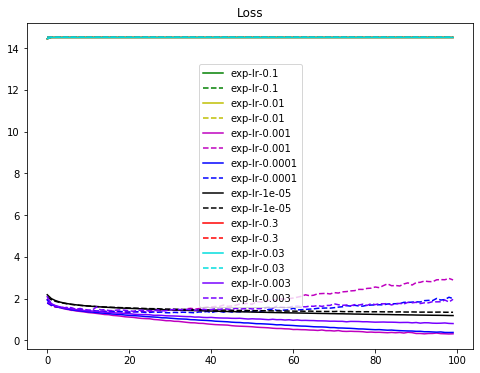

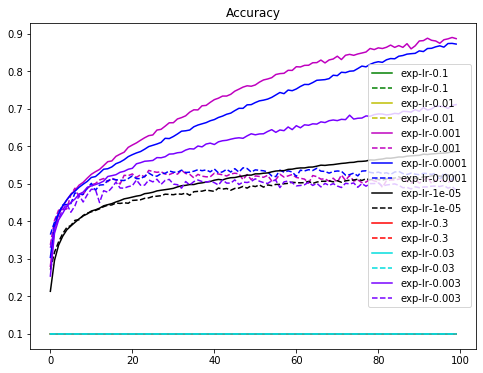

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()